<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Homework7-Scraping_UFO_reports/Homework7_Thodoris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Scraping



Πάμε να μάθουμε τι είδους UFO κυκλοφορούν αυτό το διάστημα στον πλανήτη μας! Φυσικά δεν θα βγούμε στο μπαλκόνι να τα ψάξουμε, γιατί πολύ 
απλά το έχουν κάνει χιλιάδες άνθρωποι πριν από εμάς και έχουν καταγράψει λεπτομερώς τι είδαν στο εκπληκτικό site: 

**NATIONAL UFO 
REPORTING CENTER** ( http://www.nuforc.org/webreports/ndxevent.html)


Για αρχή εισάγετε τις βιβλιοθήκες που θα χρειαστείτε

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

Πάμε να φέρουμε τα δεδομένα μας με BeautifulSoup από τη λίστα με τις εμφανίσεις των "Άγνωστης Ταυτότητας Ιπτάμενων Αντικειμένων" 
που βρίσκεται εδώ: http://www.nuforc.org/webreports/ndxevent.html

In [2]:
my_url = 'http://www.nuforc.org/webreports/ndxevent.html'

raw_html = urlopen(my_url).read()
ufos_doc = BeautifulSoup(raw_html, "html.parser")

Ρίξτε μια ματιά σ' αυτά που πήρατε τυπώνοντας το αποτέλεσμα της beautifulSoup

Φαίνεται μια χαρά, τώρα ανοίξτε την σελίδα αυτή ( http://www.nuforc.org/webreports/ndxevent.html )
στον browser και βρείτε με δεξί κλικ inspect, 

1.) πώς είναι γραμμένα στην html τα links για τις εσωτερικές σελίδες και 

2.) πώς είναι γραμμένα τα νούμερα των αναφορών που έγιναν κάθε μέρα

In [3]:
#κρατήστε σημειώσεις εδώ για να θυμάστε τι ψάχνετε
# τα δεδομένα βρίσκονται σε πίνακα (table): 
# τα links είναι στο href των <a> tags
# τα counts είναι σε <td> tags με attribute: align="RIGHT"

## 1.Φτιάξτε μια μεταβλητή links όπως φαίνεται παρακάτω συμπληρώνοντας αυτό που λείπει 


In [4]:
links = ufos_doc.find_all('a')

In [5]:
links

[<a href="https://www.nuforc.org">NUFORC Home</a>,
 <a href="ndxe202204.html">04/2022</a>,
 <a href="ndxe202203.html">03/2022</a>,
 <a href="ndxe202202.html">02/2022</a>,
 <a href="ndxe202201.html">01/2022</a>,
 <a href="ndxe202112.html">12/2021</a>,
 <a href="ndxe202111.html">11/2021</a>,
 <a href="ndxe202110.html">10/2021</a>,
 <a href="ndxe202109.html">09/2021</a>,
 <a href="ndxe202108.html">08/2021</a>,
 <a href="ndxe202107.html">07/2021</a>,
 <a href="ndxe202106.html">06/2021</a>,
 <a href="ndxe202105.html">05/2021</a>,
 <a href="ndxe202104.html">04/2021</a>,
 <a href="ndxe202103.html">03/2021</a>,
 <a href="ndxe202102.html">02/2021</a>,
 <a href="ndxe202101.html">01/2021</a>,
 <a href="ndxe202012.html">12/2020</a>,
 <a href="ndxe202011.html">11/2020</a>,
 <a href="ndxe202010.html">10/2020</a>,
 <a href="ndxe202009.html">09/2020</a>,
 <a href="ndxe202008.html">08/2020</a>,
 <a href="ndxe202007.html">07/2020</a>,
 <a href="ndxe202006.html">06/2020</a>,
 <a href="ndxe202005.html">05

## 2. Φτιάξτε άλλη μία που περιέχει τον αριθμό των συμβάντων, συμπληρώστε αυτό που λείπει.

In [6]:
count = ufos_doc.find_all('td', {'align': "RIGHT"})

Ελέγξτε ότι πήρατε αυτά που θέλετε τυπώνοντας τις μεταβλητές links & count

In [7]:
count

[<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">154</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">285</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">301</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">325</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">346</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">257</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">265</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">252</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">253</font></td>,
 <td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">216</font></td>,
 <td align="RIGHT"><font color="#000000"

## Φτιάξτε μια μεταβλητή urls για κάθε ένα link που βρίσκεται στη λίστα links που ορίσατε παραπάνω

Αυτό που θα μάθετε παρακάτω είναι ο τρόπος με τον οποίο κάνουμε λούπες στα Pandas και λέγεται list comprehension!!!

In [8]:
urls = [line['href'] for line in links]

In [9]:
urls

['https://www.nuforc.org',
 'ndxe202204.html',
 'ndxe202203.html',
 'ndxe202202.html',
 'ndxe202201.html',
 'ndxe202112.html',
 'ndxe202111.html',
 'ndxe202110.html',
 'ndxe202109.html',
 'ndxe202108.html',
 'ndxe202107.html',
 'ndxe202106.html',
 'ndxe202105.html',
 'ndxe202104.html',
 'ndxe202103.html',
 'ndxe202102.html',
 'ndxe202101.html',
 'ndxe202012.html',
 'ndxe202011.html',
 'ndxe202010.html',
 'ndxe202009.html',
 'ndxe202008.html',
 'ndxe202007.html',
 'ndxe202006.html',
 'ndxe202005.html',
 'ndxe202004.html',
 'ndxe202003.html',
 'ndxe202002.html',
 'ndxe202001.html',
 'ndxe201912.html',
 'ndxe201911.html',
 'ndxe201910.html',
 'ndxe201909.html',
 'ndxe201908.html',
 'ndxe201907.html',
 'ndxe201906.html',
 'ndxe201905.html',
 'ndxe201904.html',
 'ndxe201903.html',
 'ndxe201902.html',
 'ndxe201901.html',
 'ndxe201812.html',
 'ndxe201811.html',
 'ndxe201810.html',
 'ndxe201809.html',
 'ndxe201808.html',
 'ndxe201807.html',
 'ndxe201806.html',
 'ndxe201805.html',
 'ndxe201804.

Χμ, τα links είναι μια χαρά, εκτός από το πρώτο που δεν το θέλουμε και θα μας χαλάσει το scraping, 
ας πούμε στην λίστα να μην πάρει την πρώτη εγγραφή

In [10]:
urls = [line['href'] for line in links][1:]

In [11]:
urls

['ndxe202204.html',
 'ndxe202203.html',
 'ndxe202202.html',
 'ndxe202201.html',
 'ndxe202112.html',
 'ndxe202111.html',
 'ndxe202110.html',
 'ndxe202109.html',
 'ndxe202108.html',
 'ndxe202107.html',
 'ndxe202106.html',
 'ndxe202105.html',
 'ndxe202104.html',
 'ndxe202103.html',
 'ndxe202102.html',
 'ndxe202101.html',
 'ndxe202012.html',
 'ndxe202011.html',
 'ndxe202010.html',
 'ndxe202009.html',
 'ndxe202008.html',
 'ndxe202007.html',
 'ndxe202006.html',
 'ndxe202005.html',
 'ndxe202004.html',
 'ndxe202003.html',
 'ndxe202002.html',
 'ndxe202001.html',
 'ndxe201912.html',
 'ndxe201911.html',
 'ndxe201910.html',
 'ndxe201909.html',
 'ndxe201908.html',
 'ndxe201907.html',
 'ndxe201906.html',
 'ndxe201905.html',
 'ndxe201904.html',
 'ndxe201903.html',
 'ndxe201902.html',
 'ndxe201901.html',
 'ndxe201812.html',
 'ndxe201811.html',
 'ndxe201810.html',
 'ndxe201809.html',
 'ndxe201808.html',
 'ndxe201807.html',
 'ndxe201806.html',
 'ndxe201805.html',
 'ndxe201804.html',
 'ndxe201803.html',


Ας τσεκάρουμε και τη λίστα count

In [12]:
[print(line) for line in count]

<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">154</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">285</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">301</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">325</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">346</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">257</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">265</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">252</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">253</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">216</font></td>
<td align="RIGHT"><font color="#000000" face="Calibri" style

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## 3. Φτιάξτε μια λίστα links την οποία θα γεμίσετε με τα ολοκληρωμένα urls που θα έχουν τη μορφή 
"http://www.nuforc.org/webreports/ndxe201903.html,
    http://www.nuforc.org/webreports/ndxe201902.html κ.λπ"

In [13]:
links = [("http://www.nuforc.org/webreports/" + line) for line in urls]

In [14]:
links

['http://www.nuforc.org/webreports/ndxe202204.html',
 'http://www.nuforc.org/webreports/ndxe202203.html',
 'http://www.nuforc.org/webreports/ndxe202202.html',
 'http://www.nuforc.org/webreports/ndxe202201.html',
 'http://www.nuforc.org/webreports/ndxe202112.html',
 'http://www.nuforc.org/webreports/ndxe202111.html',
 'http://www.nuforc.org/webreports/ndxe202110.html',
 'http://www.nuforc.org/webreports/ndxe202109.html',
 'http://www.nuforc.org/webreports/ndxe202108.html',
 'http://www.nuforc.org/webreports/ndxe202107.html',
 'http://www.nuforc.org/webreports/ndxe202106.html',
 'http://www.nuforc.org/webreports/ndxe202105.html',
 'http://www.nuforc.org/webreports/ndxe202104.html',
 'http://www.nuforc.org/webreports/ndxe202103.html',
 'http://www.nuforc.org/webreports/ndxe202102.html',
 'http://www.nuforc.org/webreports/ndxe202101.html',
 'http://www.nuforc.org/webreports/ndxe202012.html',
 'http://www.nuforc.org/webreports/ndxe202011.html',
 'http://www.nuforc.org/webreports/ndxe202010.

## 4.  Τώρα που έχετε μια λίστα με τα links, αρχίστε το scraping των reports κάθε μήνα. Μπορείτε να χρησιμοποιήσετε ή beautiful soup ή selenium ή συνδυασμό των 2.

Δείτε τι περιλαμβάνει κάθε εγγραφή π.χ. εδώ: http://www.nuforc.org/webreports/ndxe201904.html

Πρέπει για κάθε εγγραφή να πάρετε Date, City, State, Shape και Summary.

## Μέσα στον scraper θα δημιουργείτε dictionaries τα οποία στην συνέχεια θα γίνουν οι στήλες του dataframe σας.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Κατέβασμα της αρχικής σελίδας του NUFORC
response = requests.get('http://www.nuforc.org/webreports/ndxevent.html') 
ufos_doc = BeautifulSoup(response.text, 'html.parser') 

# Μάζεμα όλων των links όλων των σελίδων των μηνών
a_tags = ufos_doc.find_all('a')
links_m = [("http://www.nuforc.org/webreports/" + line['href']) for line in a_tags][1:]

# Μάζεμα όλων των html όλων των σελίδων
ufo_soups = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των html των σελίδων των κατηγοριών
for link_m in links_m:
  html_text = requests.get(link_m).text
  ufo_soup = BeautifulSoup(html_text, "html.parser")
  print(f"Now Scraping - {link_m}")
  time.sleep(3)
  ufo_soups.append(ufo_soup)

Now Scraping - http://www.nuforc.org/webreports/ndxe202204.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202203.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202202.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202201.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202112.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202111.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202110.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202109.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202108.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202107.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202106.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202105.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202104.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202103.html
Now Scraping - http://www.nuforc.org/webreports/ndxe202102.html
Now Scraping - http://www.nuforc.org/web

In [16]:
all_reports = ufo_soups[1].find('tbody').find_all('tr')
all_reports

[<tr valign="TOP">
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt"><a href="reports/167/S167330.html">3/31/22 23:50</a></font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Lincoln</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">CA</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">USA</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Circle</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">10+ min</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">2 Floating / Hovering Circles of Light</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">4/22/22</font></td>
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt"><br/></font></td>
 </tr>, <tr valign="TOP">
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt"><a href="reports/167/S167332.html">3/31/22 20:57</a></font></

In [17]:
report_data = all_reports[1].find_all('td')
report_data

[<td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt"><a href="reports/167/S167332.html">3/31/22 20:57</a></font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Hickory</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">NC</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">USA</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Light</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">2 minutes</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Light saw making a circular rotation repeatedly. You could see half of the circle being made then the other half would disappear.</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">4/22/22</font></td>,
 <td><font color="#000000" face="Calibri" style="FONT-SIZE:11pt"><br/></font></td>]

In [18]:
report_data[6].text

'Light saw making a circular rotation repeatedly. You could see half of the circle being made then the other half would disappear.'

In [19]:
# Μάζεμα και αποθήκευση όλων των δεδομένων που μας ενδιαφέρουν (date, city, state, shape, summary) για όλα τα reports
all_reports_list = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των δεδομένων όλων των reports
for ufo_soup in ufo_soups:
  all_reports = ufo_soup.find('tbody').find_all('tr')
  for report in all_reports: 
    report_dict = {} # δημιουργία κενού λεξικού για την αποθήκευση των δεδομένων κάθε report
    report_data = report.find_all('td')
    date = report_data[0] 
    if date: 
      report_dict['Date'] = date.text # date
    city = report_data[1] 
    if city: 
      report_dict['City'] = city.text # city
    state = report_data[2] 
    if state: 
      report_dict['State'] = state.text # state
    shape = report_data[4]
    if shape:
      report_dict['Shape'] = shape.text # shape
    summary = report_data[6]
    if summary:
      report_dict['Summary'] = summary.text # summary
    all_reports_list.append(report_dict)

In [20]:
all_reports_list[:5]

[{'City': 'Mansfield',
  'Date': '4/22/22 11:00',
  'Shape': 'Cigar',
  'State': 'OH',
  'Summary': 'It was at least a mile long .all lite up .'},
 {'City': 'Howard City',
  'Date': '4/22/22 05:35',
  'Shape': 'Cross',
  'State': 'MI',
  'Summary': 'It was Shaped like a capitalized letter "T"'},
 {'City': 'Tipton',
  'Date': '4/22/22 00:12',
  'Shape': 'Cigar',
  'State': 'IN',
  'Summary': 'Saw a cigar shaped craft with lights on the underneath hovering above the city flying at fast speeds  ((Starlink satellites??))'},
 {'City': 'East Concord',
  'Date': '4/21/22 22:55',
  'Shape': 'Cylinder',
  'State': 'NY',
  'Summary': 'It was a silver/grey large cylinder shaped, moving slow and silent, going from north to south, as we tried to video it, it faded out.'},
 {'City': 'Blairsville',
  'Date': '4/21/22 22:02',
  'Shape': 'Cigar',
  'State': 'PA',
  'Summary': 'Long cylinder, could see was metallic. Looked yellowish, lights along top.'}]

## 5. Μετατρέψτε τη λίστα με τα λεξικά σε ένα dataframe

In [21]:
# Δημιουργία του dataframe
ufo_reports_df = pd.DataFrame(all_reports_list)

## Ρίξτε μια ματιά στα δεδομένα σας

In [22]:
ufo_reports_df

,Date,City,State,Shape,Summary
0,4/22/22 11:00,Mansfield,OH,Cigar,It was at least a mile long .all lite up .
1,4/22/22 05:35,Howard City,MI,Cross,"It was Shaped like a capitalized letter ""T"""
2,4/22/22 00:12,Tipton,IN,Cigar,Saw a cigar shaped craft with lights on the un...
3,4/21/22 22:55,East Concord,NY,Cylinder,"It was a silver/grey large cylinder shaped, mo..."
4,4/21/22 22:02,Blairsville,PA,Cigar,"Long cylinder, could see was metallic. Looked ..."
...,...,...,...,...,...
138012,,Canfield,OH,Triangle,Strange sighting of huge triangular UFO spotte...
138013,,Kelowna (Canada),BC,,"They were close to my home, hope they come soo..."
138014,,Rule,TX,Unknown,Unusual sounds and starlight distortion defini...
138015,,Gulf Breeze,FL,,The gulf breeze florida sightings were a AC130...


In [23]:
ufo_reports_df['Shape'].unique()

array(['Cigar', 'Cross', 'Cylinder', '', 'Formation', 'Other', 'Disk',
       'Star', 'Unknown', 'Oval', 'Changing', 'Light', 'Triangle',
       'Circle', 'Sphere', 'Fireball', 'Diamond', 'Rectangle', 'Cone',
       'Teardrop', 'Egg', 'Chevron', 'Delta', 'Flash', 'rectangle',
       'light', 'other', 'fireball', 'triangle', 'circle', 'cylinder',
       'unknown', 'delta', 'cigar', 'sphere', 'oval', 'egg', 'diamond',
       'flash', 'changing'], dtype=object)

In [24]:
# Παρατηρώ ότι υπάρχουν πάρα πολλά ίδια σχήματα που είναι γραμμένα και σε lowercase
# Άρα, πρέπει να τα κάνω όλα capitalize (κεφαλαίο το πρώτο γράμμα)
ufo_reports_df["Shape"] = ufo_reports_df["Shape"].str.capitalize()
ufo_reports_df['Shape'].unique()

array(['Cigar', 'Cross', 'Cylinder', '', 'Formation', 'Other', 'Disk',
       'Star', 'Unknown', 'Oval', 'Changing', 'Light', 'Triangle',
       'Circle', 'Sphere', 'Fireball', 'Diamond', 'Rectangle', 'Cone',
       'Teardrop', 'Egg', 'Chevron', 'Delta', 'Flash'], dtype=object)

In [25]:
ufo_reports_df.sort_values('State')['State'].unique()

array(['', 'AB', 'AK', 'AL', 'AR', 'AZ', 'Aberdeen', 'Adana Province',
       'Alajuela Province', 'Alberta', 'Alborz Province',
       'Alexandria Governorate', 'Andaman and Nicobar Islands',
       'Antalya Province', 'Auckland Region', 'BC', 'Bali',
       'Barcelona Province', 'Bath and North East Somerset', 'Bedford',
       'Bradford', 'Brekshire', 'British Columbia', 'Buckinghamshire',
       'Buenos Aires', 'Butel Municipality', 'Bács-Kiskun County', 'CA',
       'CO', 'CT', 'Ca', 'Capital Region', 'Cheshire West and Chester',
       'Chon Buri', 'City of Bristol', 'Cornwall', 'County Dublin',
       'County Durham', 'County Waterford', 'DC', 'DE', 'Delhi',
       'Derbyshire', 'Devon', 'East Sussex', 'Essex', 'FL', 'Fl', 'GA',
       'Gauteng', 'Gloucestershire', 'Guam', 'Gwynedd', 'HI', 'Hampshire',
       'Hertfordshire', 'Heves County', 'Ho Chi Minh City', 'IA', 'ID',
       'IL', 'IN', 'Isle of Wight', 'KS', 'KY', 'Karnataka', 'Kent',
       'Krasnodar Krai', 'LA', 'Lancas

In [26]:
# Μάλιστα... χαμούλης στα States - τα αφήνω όπως είναι.

## 6. Φτιάξτε ένα κόκκινο bar chart, σορταρισμένο στο οποίο θα εμφανίζονται τα 5 δημοφιλέστερα σχήματα των UFO

       Shape  count
15     Light  27962
4     Circle  14593
22  Triangle  12402
12  Fireball   9605
16     Other   9487


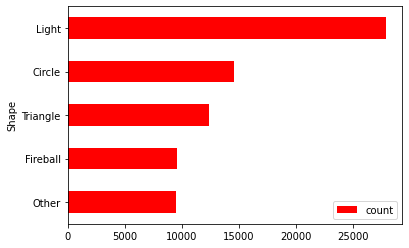

In [27]:
print(ufo_reports_df.groupby('Shape').size().reset_index(name='count').sort_values('count', ascending=False).head(5))
ufo_reports_df.groupby('Shape').size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh(x='Shape', y='count', color='r').invert_yaxis()

## 7. Βρείτε σε ποια πολιτεία εμφανίζονται τα περισσότερα UFO.

    State  count
27     CA  15204
0           9389
46     FL   7615
159    WA   6787
144    TX   5687


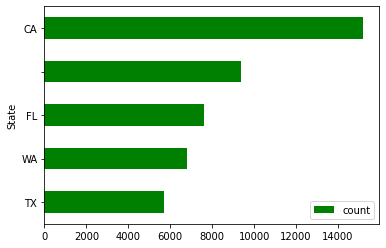

In [28]:
print(ufo_reports_df.groupby('State').size().reset_index(name='count').sort_values('count', ascending=False).head(5))
ufo_reports_df.groupby('State').size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh(x='State', y='count', color='g').invert_yaxis()

## 8. Μήπως εμφανίζονται άλλα UFO ανάλογα με την περιοχή? Δείτε ποια σχήματα εμφανίζονται συχνότερα σε ποια περιοχή και φτιάξτε ένα γράφημα.

In [29]:
df_shape = ufo_reports_df.groupby(['Shape', 'State']).size().sort_values(ascending=False).reset_index(name='count')#.drop_duplicates(subset='')
df_shape.head(10)

,Shape,State,count
0,Light,CA,3103
1,Light,,1709
2,Circle,CA,1567
3,Light,FL,1442
4,Light,WA,1432
5,Triangle,CA,1259
6,Light,TX,1150
7,Fireball,CA,1126
8,Other,CA,1088
9,Circle,,1067


In [30]:
df_shape_n = pd.pivot_table(df_shape, index="Shape",columns="State", values='count', fill_value=0).reset_index().rename_axis(None, axis=1)
df_shape_n.set_index('Shape', inplace=True)
df_shape_n.index.name = None
df_shape_n["sum"] = df_shape_n.sum(axis=1)
df_shape_n = df_shape_n.sort_values('sum', ascending=False)
df_shape_n10 = df_shape_n.head(10).T
df_shape_n10

,Light,Circle,Triangle,Fireball,Other,Unknown,Sphere,Disk,,Oval
,1709,1067,729,538,717,566,618,734,505,445
AB,150,58,75,24,47,58,38,41,12,22
AK,147,74,43,34,35,41,41,44,22,35
AL,266,139,132,84,82,84,84,74,44,53
AR,247,121,137,51,71,87,55,66,113,34
...,...,...,...,...,...,...,...,...,...,...
YK,1,1,0,0,0,1,0,1,2,0
YT,3,3,4,2,3,3,3,0,0,0
null,1,3,3,0,1,0,0,0,0,0
Örebro County,0,0,0,0,0,1,0,0,0,0


In [31]:
df_shape_n10['sum'] = df_shape_n10.sum(axis=1)
df_shape_n10 = df_shape_n10.sort_values('sum', ascending=False)
df_shape_n10.iloc[1:11]

,Light,Circle,Triangle,Fireball,Other,Unknown,Sphere,Disk,,Oval,sum
CA,3103,1567,1259,1126,1088,942,1059,948,517,644,12253
,1709,1067,729,538,717,566,618,734,505,445,7628
FL,1442,862,621,755,490,515,519,404,291,355,6254
WA,1432,624,516,515,465,516,426,315,589,281,5679
TX,1150,528,568,304,444,429,346,351,157,302,4579
NY,1029,656,476,391,360,331,329,377,225,275,4449
PA,903,523,446,392,311,332,279,266,177,220,3849
AZ,1046,464,363,306,367,299,277,233,182,183,3720
OH,765,427,418,355,261,264,295,229,224,185,3423
IL,889,423,435,309,228,255,246,231,169,170,3355


Text(0, 0.5, 'Number of Reports')

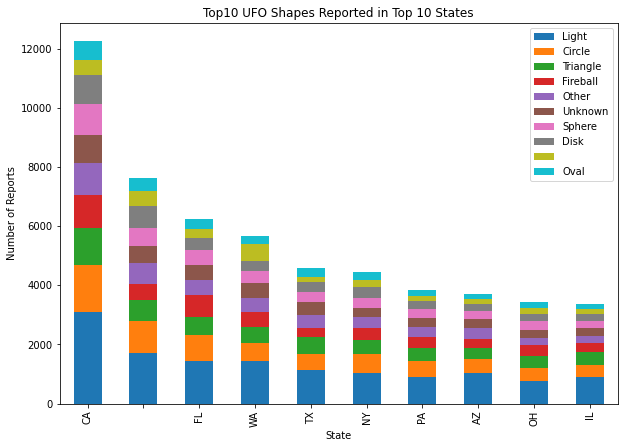

In [32]:
df_shape_n10.iloc[1:11].drop('sum', axis=1).plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Top10 UFO Shapes Reported in Top 10 States")
plt.xlabel("State")
plt.ylabel("Number of Reports")

## 9. Φτιάξτε ακόμη 2 γραφήματα της επιλογής σας που να έχουν νόημα!

Text(0, 0.5, 'Percentage of Reports')

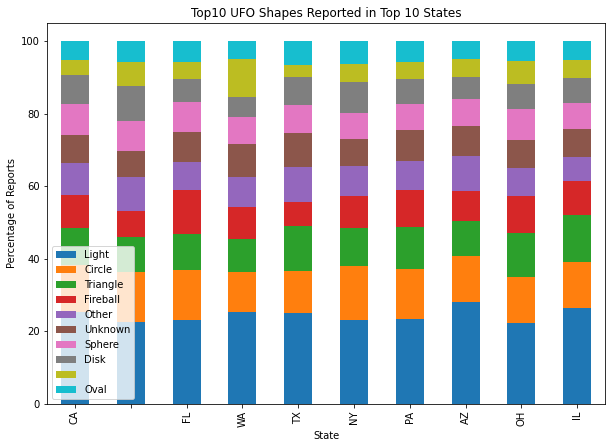

In [33]:
df_Stacked = df_shape_n10.drop('sum', axis=1).apply(lambda x: x*100/sum(x), axis=1)
df_Stacked.iloc[1:11].plot(kind='bar', stacked=True, figsize=(10,7))
plt.title("Top10 UFO Shapes Reported in Top 10 States")
plt.xlabel("State")
plt.ylabel("Percentage of Reports")

([<matplotlib.axis.XTick at 0x7f56d8571110>,
 [Text(0, 0, 'CA'),
  Text(0, 0, ''),
  Text(0, 0, 'FL'),
  Text(0, 0, 'WA'),
  Text(0, 0, 'TX'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'AZ'),
  Text(0, 0, 'OH'),
  Text(0, 0, 'IL')])

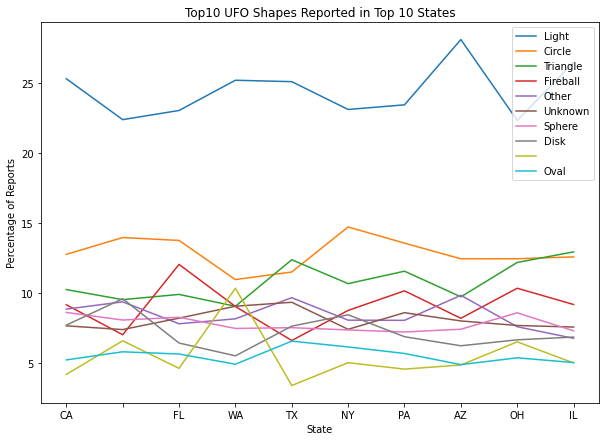

In [34]:
df_Stacked.iloc[1:11].plot(figsize=(10,7))
plt.title("Top10 UFO Shapes Reported in Top 10 States")
plt.xlabel("State")
plt.ylabel("Percentage of Reports")
#plt.xticks()
plt.xticks(np.arange(10), df_Stacked.iloc[1:11].index)

**Συμπέρασμα**: Παρότι το ποσοστό αναφορών για τα 10 πρώτα σχήματα UFO παρουσιάζουν μικρές διαφοροποιήσεις από Πολιτεία σε Πολιτεία, η γενική αναλογία των σχημάτων των αναφερόμενων UFOs είναι περίπου η ίδια σε όλες τις Πολιτείες.

## 10. Σώστε τα δεδομένα σε ένα καινούριο csv.

In [35]:
from google.colab import drive # εισαγωγή της βιβλιοθήκης drive
drive.mount('gdrive') # mount ενός folder στο drive (μένει ως έχει)
#ls 'gdrive/MyDrive/' # επισκόπηση των περιεχομένων του MyDrive (μένει ως έχει)

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [36]:
ls 'gdrive/MyDrive/Colab Notebooks/EDDE2'

 accidents-us-map.png                 Homework7-Thodoris.ipynb
'Grafimata (rich people).ipynb'       topstates-in-accidents.csv
 Homework3Α_movies-Paraskevas.ipynb   ufo_reports.csv
 Homework4_animals-Paraskevas.ipynb   une_rt_a_1_Data.csv
'Homework6 - MergeApply.ipynb'        une_rt_a_Label.csv
 Homework6-Paraskevas.ipynb


In [37]:
ufo_reports_df.to_csv("gdrive/MyDrive/Colab Notebooks/EDDE2/ufo_reports.csv", index=False) # εγγραφή του csv στον φάκελο που θέλουμε στο drive μας (αντικαθιστούμε το SomeFolderName με το όνομα του φακέλου που θέλουμε να σωθεί το csv)